**Table of contents**<a id='toc0_'></a>    
- [meshgrid&mgrid](#toc1_1_)    
    - [坐标矩阵](#toc1_1_1_)    
      - [Example 1.1](#toc1_1_1_1_)    
      - [Example 1.2](#toc1_1_1_2_)    
    - [meshgrid()](#toc1_1_2_)    
      - [Example 1.3](#toc1_1_2_1_)    
      - [Example 1.4](#toc1_1_2_2_)    
      - [meshgrid()使用解释](#toc1_1_2_3_)    
      - [二维数据进行解释](#toc1_1_2_4_)    
  - [mgird()与多维结构](#toc1_2_)    
      - [Example 2.1 (1d结构(array))](#toc1_2_1_1_)    
      - [Example 2.2 (2d结构(matrix))](#toc1_2_1_2_)    
        - [将各维度返回值合并](#toc1_2_1_2_1_)    
      - [Example 2.2 (3d结构)](#toc1_2_1_3_)    
      - [三维绘图](#toc1_2_1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[meshgrid&mgrid](#toc0_)
*np.meshgrid()——生成网格点坐标矩阵*

### <a id='toc1_1_1_'></a>[坐标矩阵](#toc0_)

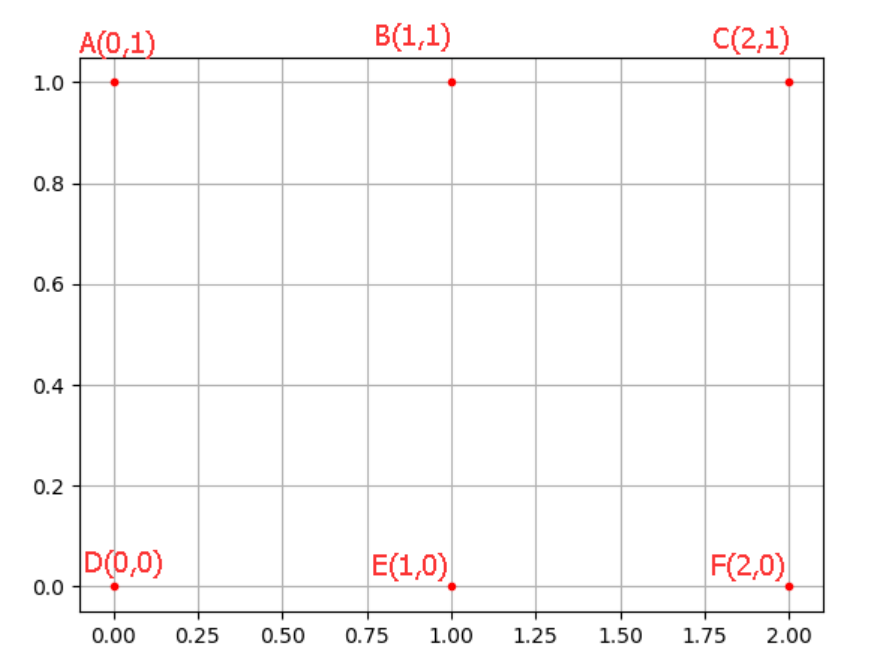

图中每个交叉点都是网格点，描述这些网格点的坐标的矩阵，就是坐标矩阵。

A,B,C,D,E,F是6个网格点，描述他们的坐标矩阵如下：
$X=\begin{bmatrix}0&1&2\\0&1&2\end{bmatrix}$，$Y=\begin{bmatrix}1&1&1\\0&0&0\end{bmatrix}$

这就是坐标矩阵——横坐标矩阵XXX中的每个元素，与纵坐标矩阵YYY中对应位置元素,共同构成一个点的完整坐标。如B点坐标$(X_{12},Y_{12})=(1,1)$。

**通常使用一列横坐标（线性代数中的1维列向量），一列纵坐标生成（两者元素个数相等）生成A,B,C,D,E,F**

**然而给matplotlib的坐标信息是矩阵也是可以的，只要横纵坐标的尺寸一样。都会按照对应关系生成点。**

#### <a id='toc1_1_1_1_'></a>[Example 1.1](#toc0_)

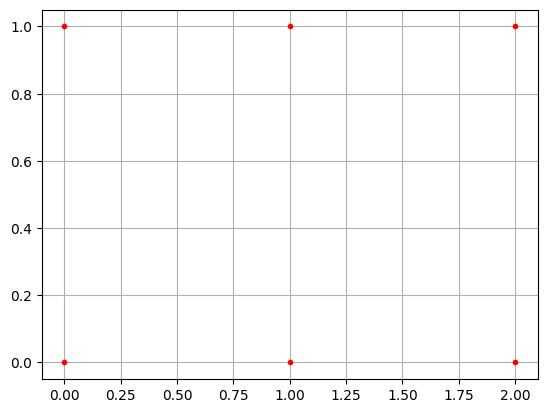

In [4]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.array([[0, 1, 2], [0, 1, 2]])
y = np.array([[0, 0, 0], [1, 1, 1]])
 
 
plt.plot(x, y,
   color='red', # 全部点设置为红色
   marker='.', # 点的形状为圆点
   linestyle='') # 线型为空，也即点与点之间不用线连接
plt.grid(True) # 显示网格线
plt.savefig("grid1.png")

按照矩阵给定坐标点信息，matplotlib会把横坐标矩阵中，每一列对应的点当做同一条线。将linestyle修改为默认状态linestyle='-'。

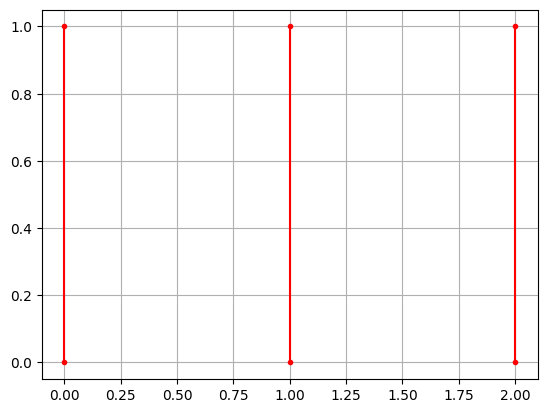

In [14]:
x = np.array([[0, 1, 2], [0, 1, 2]])
y = np.array([[0, 0, 0], [1, 1, 1]])
 
 
plt.plot(x, y,
   color='red', # 全部点设置为红色
   marker='.', # 点的形状为圆点
   linestyle='-') # 设置线形为点划线
plt.grid(True) # 显示网格线
plt.savefig("grid2")

可以看到A-D连线，B-E连线，C-F连线

#### <a id='toc1_1_1_2_'></a>[Example 1.2](#toc0_)

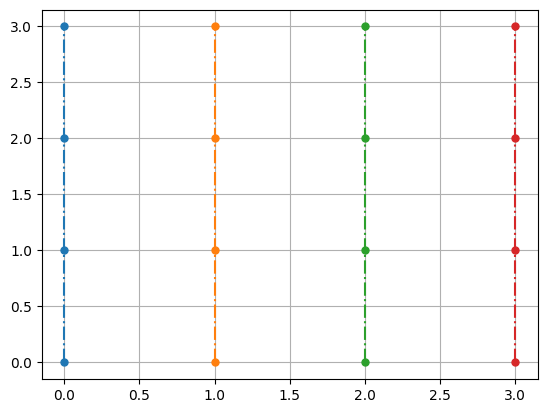

In [15]:
x = np.array([[0, 1, 2, 3],
    [0, 1, 2, 3],
    [0, 1, 2, 3],
    [0, 1, 2, 3]])
y = np.array([[0, 0, 0, 0],
    [1, 1, 1, 1],
    [2, 2, 2, 2],
    [3, 3, 3, 3]])
 
 
plt.plot(x, y,
   # 没有指定颜色，则会自动选择颜色渲染
   marker='.', # 点的形状为圆点
   markersize=10, # 点设置大一点，看着清楚
   linestyle='-.') # 线型为点划线
plt.grid(True)
plt.savefig("grid3.png")

如果点的数量过多怎么办？

我们容易发现坐标矩阵有很多重复，此时meshgrid()函数就排上用场了。
### <a id='toc1_1_2_'></a>[meshgrid()](#toc0_)
注意到练习题中的坐标矩阵，其实有大量的重复——X的每一行都一样，Y的每一列都一样。基于这种强烈的规律性，numpy提供的numpy.meshgrid()函数可以让我们快速生成坐标矩阵X，Y。

**语法：X,Y = numpy.meshgrid(x, y)
输入的x，y，就是网格点的横纵坐标列向量（非矩阵）
输出的X，Y，就是坐标矩阵。**

#### <a id='toc1_1_2_1_'></a>[Example 1.3](#toc0_)

[[0 1 2]
 [0 1 2]]
[[0 0 0]
 [1 1 1]]


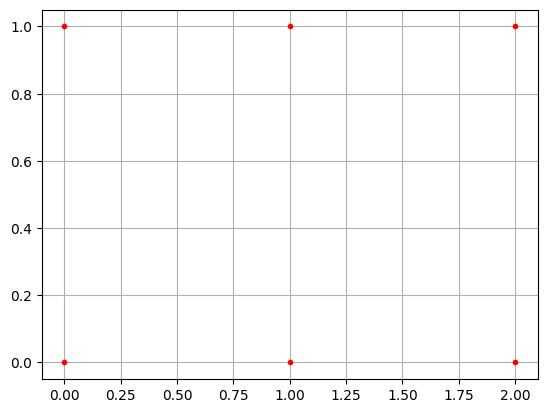

In [16]:
x = np.array([0, 1, 2])
y = np.array([0, 1])
 
X, Y = np.meshgrid(x, y)
print(X)
print(Y)
 
 
plt.plot(X, Y,
   color='red', # 全部点设置为红色
   marker='.', # 点的形状为圆点
   linestyle='') # 线型为空，也即点与点之间不用线连接
plt.grid(True)

从输出结果可以看出，meshgrid()生成的坐标矩阵完全相同。

#### <a id='toc1_1_2_2_'></a>[Example 1.4](#toc0_)

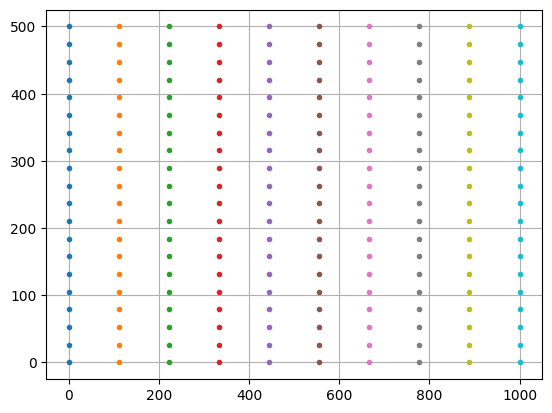

In [20]:
x = np.linspace(0, 1000, 10)
y = np.linspace(0, 500, 20)
X, Y = np.meshgrid(x, y)

plt.plot(X, Y, marker = '.', linestyle='')
plt.grid(True)
plt.savefig("grid4.png")

#### <a id='toc1_1_2_3_'></a>[meshgrid()使用解释](#toc0_)
* [X,Y]=meshgrid(x,y)
* [X,Y]=meshgrid(x)与[X,Y]=meshgrid(x,x)是等同的，即如果生成x和y相等，可以写一个向量
* [X,Y,Z]=meshgrid(x,y,z)生成三维数组，可用来计算三变量的函数和绘制三维立体图

注：其中x和y均为行向量

#### <a id='toc1_1_2_4_'></a>[二维数据进行解释](#toc0_)
* meshgrid中的结果X是以第一参数x在**垂直方向上的复制和堆叠**。
* meshgrid中的结果Y是以第二参数**y的转置（变为列向量）在水平方向上的复制和堆叠**。
* meshgrid中的结果X和Y的维度都是：len(y) * len(x)
* meshgrid的作用是：
根据传入的两个一维数组参数生成两个数组元素的列表。
如果第一个参数是xarray，维度是xdimesion,也就是列的个数，
第二个参数是yarray，维度是ydimesion，也就是行的个数，
那么生成的第一个二维数组是以xarray为行，共ydimesion行的向量；
而第二个二维数组是以yarray的转置为列，共xdimesion列的向量。

## <a id='toc1_2_'></a>[mgird()与多维结构](#toc0_)
*mgrid()——用于生成多维结构*

np.meshgrid()只能处理二维情况，而np.mgrid()可以用于多维情况

* **调用格式：returns=np.mgrid[1d, 2d, 3d, ...]**
* **1d, 2d, ...=[start:end:num]**
* start:开始坐标；
* stop:结束坐标；
* num:步长(个数)，步长为复数表示点数，左闭右闭；步长为实数表示间隔，左闭右开
* 返回值：以多个矩阵的形式返回，第1返回值为第1维数据在最终结构中的分布，
第2返回值为第2维数据在最终结构中的分布，以此类推。(分布以矩阵形式呈现)。
 

**样本$（i，j）$的坐标为 $（X[i，j] ,Y[i，j]）$,$X$代表第1维，$Y$代表第2维，在此例中分别为横纵坐标。**

#### <a id='toc1_2_1_1_'></a>[Example 2.1 (1d结构(array))](#toc0_)

In [22]:
pp = np.mgrid[-5:5:5j]
print(pp)

[-5.  -2.5  0.   2.5  5. ]


#### <a id='toc1_2_1_2_'></a>[Example 2.2 (2d结构(matrix))](#toc0_)

In [26]:
pp = np.mgrid[-1:1:2j,-2:2:3j]
x, y = pp
print(pp)

[[[-1. -1. -1.]
  [ 1.  1.  1.]]

 [[-2.  0.  2.]
  [-2.  0.  2.]]]


>其中x沿着水平向右的方向扩展(即是：每列都相同)，观察x。y沿着垂直的向下的方向扩展(即是：每行都相同)。观察y。
##### <a id='toc1_2_1_2_1_'></a>[将各维度返回值合并](#toc0_)

In [12]:
x,y = np.mgrid[-1:1:2j,-2:2:3j]
dirct_product = list(map(lambda xe,ye: [(ex, ey) for ex,ey in zip(xe, ye)], x,y))
print(dirct_product)

[[(-1.0, -2.0), (-1.0, 0.0), (-1.0, 2.0)], [(1.0, -2.0), (1.0, 0.0), (1.0, 2.0)]]


#### <a id='toc1_2_1_3_'></a>[Example 2.2 (3d结构)](#toc0_)

In [25]:
pp = np.mgrid[-1:1:2j,-2:2:3j,-3:3:5j]
print(pp)

[[[[-1.  -1.  -1.  -1.  -1. ]
   [-1.  -1.  -1.  -1.  -1. ]
   [-1.  -1.  -1.  -1.  -1. ]]

  [[ 1.   1.   1.   1.   1. ]
   [ 1.   1.   1.   1.   1. ]
   [ 1.   1.   1.   1.   1. ]]]


 [[[-2.  -2.  -2.  -2.  -2. ]
   [ 0.   0.   0.   0.   0. ]
   [ 2.   2.   2.   2.   2. ]]

  [[-2.  -2.  -2.  -2.  -2. ]
   [ 0.   0.   0.   0.   0. ]
   [ 2.   2.   2.   2.   2. ]]]


 [[[-3.  -1.5  0.   1.5  3. ]
   [-3.  -1.5  0.   1.5  3. ]
   [-3.  -1.5  0.   1.5  3. ]]

  [[-3.  -1.5  0.   1.5  3. ]
   [-3.  -1.5  0.   1.5  3. ]
   [-3.  -1.5  0.   1.5  3. ]]]]


#### <a id='toc1_2_1_4_'></a>[三维绘图](#toc0_)
$f(k,b)=3k_2+2b+1$
>声明：k轴范围为1~3，b轴范围为4~6；

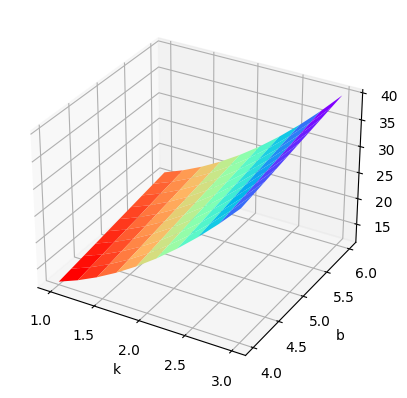

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3

k,b=np.mgrid[1:3:10j,4:6:10j]
f_kb=3*k**2+2*b+1

ax=plt.subplot(111,projection='3d')
ax.plot_surface(k,b,f_kb,rstride=1,cstride=1,cmap=plt.cm.rainbow_r) # 记得了解plot_surface参数
ax.set_xlabel('k')
ax.set_ylabel('b')
ax.set_zlabel('ErrorArray')
p.show()
